In [0]:
from fastai.vision import *

In [0]:
folder= 'masked'
file = 'urls_mask.csv'

In [0]:
folder= 'unmasked'
file= 'urls_unmasked.csv'

In [0]:
path = Path('/content')

In [0]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/urls_mask.csv'),
 PosixPath('/content/.ipynb_checkpoints'),
 PosixPath('/content/unmasked'),
 PosixPath('/content/masked'),
 PosixPath('/content/urls_unmasked.csv'),
 PosixPath('/content/sample_data')]

In [0]:
classes = ['masked', 'unmasked']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

masked


unmasked


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['masked', 'unmasked']

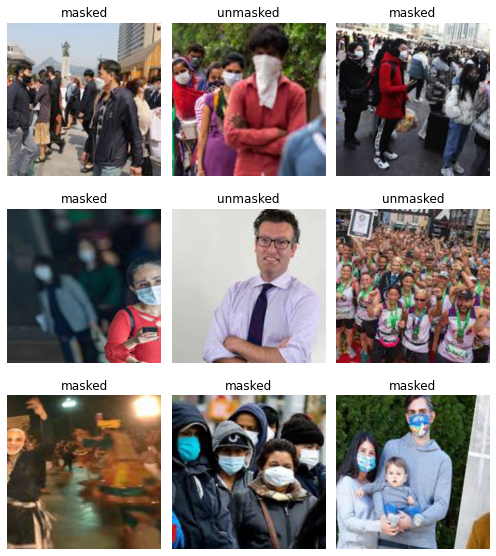

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['masked', 'unmasked'], 2, 320, 80)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.198009,1.856940,0.425000,00:04
1,0.861212,0.409020,0.150000,00:04
2,0.674976,0.447409,0.125000,00:04
3,0.567135,0.508523,0.137500,00:04


In [0]:
learn.save('stage1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


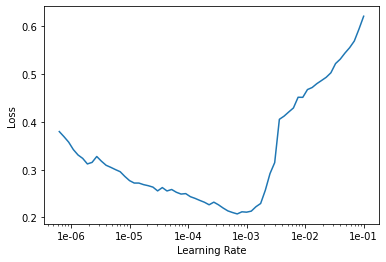

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.280748,0.695236,0.125000,00:04
1,0.267972,0.619868,0.125000,00:04
2,0.220434,0.660973,0.100000,00:04
3,0.166618,0.672918,0.100000,00:04
4,0.147739,0.672743,0.087500,00:04


In [0]:
learn.save('stage2')

In [0]:
learn.load('stage2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

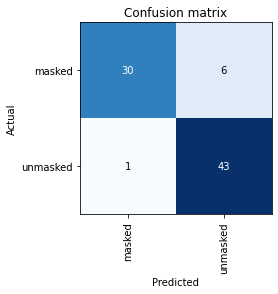

In [0]:
interp.plot_confusion_matrix()

In [0]:
#putting the model into production

learn.export()

In [0]:
defaults.device = torch.device('cpu')

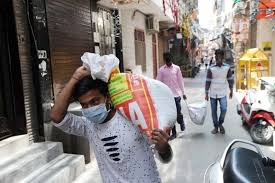

In [0]:
img = open_image(path/'masked'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category tensor(0)